In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy import stats
import seaborn as sns
from scipy.optimize import minimize
import glob, os

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import norm
from scipy import signal
from matplotlib import gridspec
import matplotlib 
from os import listdir
from os.path import isfile, join
import statsmodels.api as sm
from scipy.stats import fisher_exact,chi2_contingency
from scipy.signal import savgol_filter
from scipy.stats import entropy
from scipy.linalg import block_diag

In [6]:
def create_grid(n):

    # create n*n grid, transition matrix
    T = np.zeros((n*n,n*n))
    block = np.diag(np.ones(n-1), k=1) + np.diag(np.ones(n-1), k=-1)
    
    for c in range(n):
        T[c*n:(c+1)*n,c*n:(c+1)*n] = block
        cols = np.arange(c, n*n, n)  
        row_idx, col_idx = np.meshgrid(cols, cols, indexing='ij')  # shape (4, 4)
        T[row_idx, col_idx] = block
    
    # plot grid
    # start,end = np.where(np.triu(T)==1)
    # row_s,col_s = np.divmod(start,4)
    # row_e,col_e = np.divmod(end,4)
    
    # plt.figure()
    # plt.plot([row_s,row_e],[col_s,col_e])

    return T

In [14]:
def distance_matrix(T):
    
    # calculate distance 
    n_state = T.shape[0]
    D=np.zeros((n_state,n_state))
    step=0
    connected = np.eye(n_state)
    nsteps = np.eye(n_state)
    
    while connected.mean()<1:
    
        step=step+1
        nsteps = np.dot(nsteps,T)*(1-connected)
    
        D[nsteps>0]=step
        connected[nsteps>0]=1

    return D

In [188]:
def compare_tele(T):
    
    diff = np.zeros((n*n,n*n))
    
    for t1 in range(n*n):
        t2_all = np.where(D[t1,:]>1)[0]
        
        for t2 in t2_all:
            # introduce teleport
            T_tele = T.copy()
            T_tele[t1,t2]=1
            T_tele[t2,t1]=1
            D_tele = distance_matrix(T_tele)
            diff[t1,t2] = np.mean(D-D_tele)

    return diff

In [190]:
# find out which teleports can induce more usage
n = 4
T = create_grid(n)
D = distance_matrix(T)
diff = compare_tele(T)
teleports = np.where(np.triu(diff)>0.15)

In [198]:
# for the given teleports, which goals induce more usage?

tele_goal = np.zeros((len(teleports[0]),n,n))

for i, (t1, t2) in enumerate(zip(*teleports)):
    
    T_tele = T.copy()
    T_tele[t1,t2]=1
    T_tele[t2,t1]=1
    D_tele = distance_matrix(T_tele)
    
    tele_goal[i,:,:]=np.mean(D-D_tele,axis=0).reshape(n,n)

In [ ]:
# if restrain the maximum distance, would the trial types be balanced?

In [204]:
t1=0 
t2=7
T_tele = T.copy()
T_tele[t1,t2]=1
T_tele[t2,t1]=1
D_tele = distance_matrix(T_tele)

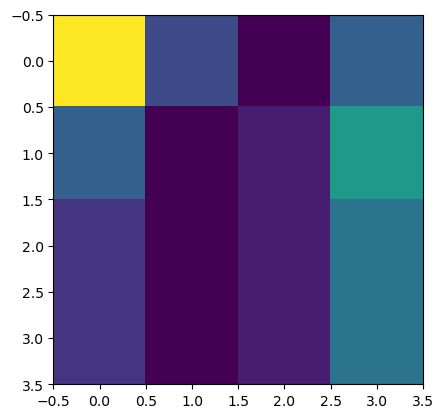

In [212]:
plt.imshow(np.mean(D-D_tele,axis=0).reshape(4,4))

In [200]:
tele_goal

array([[[0.8125, 0.1875, 0.    , 0.25  ],
        [0.25  , 0.    , 0.0625, 0.4375],
        [0.125 , 0.    , 0.0625, 0.3125],
        [0.125 , 0.    , 0.0625, 0.3125]],

       [[1.    , 0.25  , 0.    , 0.    ],
        [0.25  , 0.    , 0.0625, 0.0625],
        [0.    , 0.0625, 0.3125, 0.3125],
        [0.    , 0.0625, 0.3125, 0.3125]],

       [[0.875 , 0.25  , 0.    , 0.    ],
        [0.25  , 0.    , 0.    , 0.125 ],
        [0.    , 0.    , 0.125 , 0.5   ],
        [0.    , 0.    , 0.125 , 0.5   ]],

       [[0.8125, 0.25  , 0.125 , 0.125 ],
        [0.1875, 0.    , 0.    , 0.    ],
        [0.    , 0.0625, 0.0625, 0.0625],
        [0.25  , 0.4375, 0.3125, 0.3125]],

       [[0.875 , 0.25  , 0.    , 0.    ],
        [0.25  , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.125 , 0.125 ],
        [0.    , 0.125 , 0.5   , 0.5   ]],

       [[0.875 , 0.3125, 0.0625, 0.    ],
        [0.3125, 0.0625, 0.    , 0.0625],
        [0.0625, 0.    , 0.0625, 0.3125],
        [0.    , 0.0625,

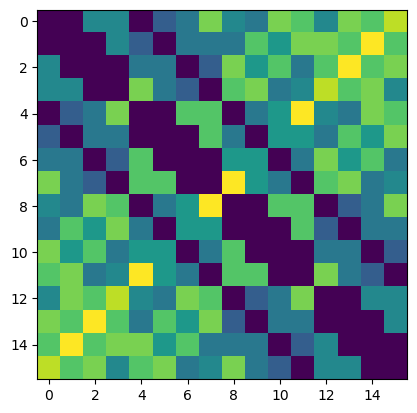

In [136]:
plt.imshow(diff)

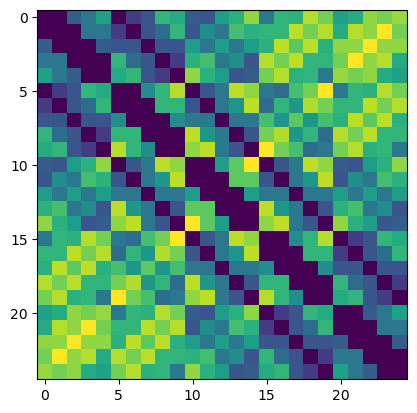

In [138]:
plt.imshow(diff5)

In [134]:
diff5 = compare_tele(5)

In [172]:
# start with these teleports for 4*4 grid
np.where(np.triu(diff)>0.15)

(array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
         2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  6,  6,
         7,  7,  7,  8,  8,  8,  9, 11]),
 array([ 7, 10, 11, 13, 14, 15,  9, 11, 12, 13, 14, 15,  8, 10, 12, 13, 14,
        15,  4,  8,  9, 12, 13, 14,  6,  7, 11, 14, 15,  7, 13, 15, 12, 14,
         8, 12, 13, 10, 11, 15, 11, 12]))

In [158]:
# start with these teleports
np.where(np.triu(diff5)>0.2)

(array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
         9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 13, 13, 14, 14, 14, 15]),
 array([14, 18, 19, 22, 23, 24, 13, 17, 18, 19, 21, 22, 23, 24, 16, 17, 18,
        20, 21, 22, 23, 24, 11, 15, 16, 17, 20, 21, 22, 23, 10, 15, 16, 20,
        21, 22,  9, 13, 14, 17, 18, 19, 23, 24, 14, 18, 19, 22, 23, 24, 15,
        17, 19, 21, 22, 23, 10, 15, 16, 20, 21, 22, 10, 11, 15, 16, 17, 20,
        21, 13, 14, 18, 19, 24, 13, 14, 19, 23, 15, 21, 15, 16, 20, 19]))

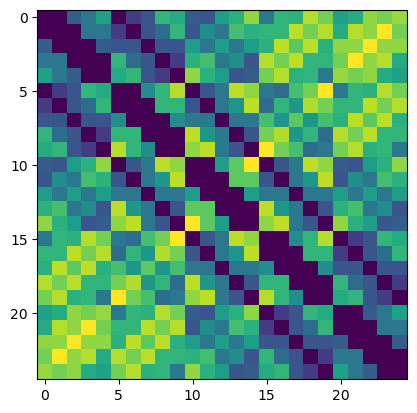

In [164]:
plt.imshow(diff5)

In [156]:
np.unique(diff5)

array([0.    , 0.0512, 0.0768, 0.0864, 0.1024, 0.1152, 0.144 , 0.1536,
       0.1632, 0.1664, 0.1792, 0.1856, 0.192 , 0.2048, 0.2176, 0.2304,
       0.2432, 0.2464, 0.256 , 0.2592, 0.2624, 0.2912])

In [148]:
T = create_grid(5)
D = distance_matrix(T)

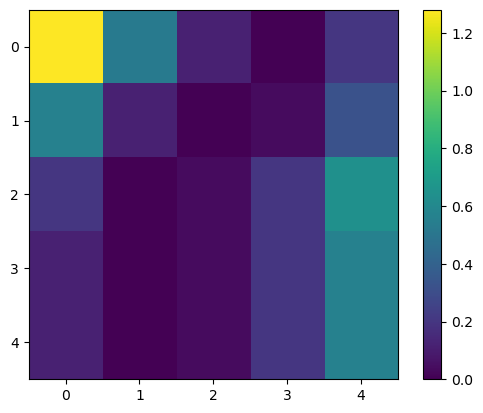

In [160]:
T_tele = teleport(T,0,14)
D_tele = distance_matrix(T_tele)
plt.imshow(np.mean(D-D_tele,axis=0).reshape(5,5))
plt.colorbar()

Text(3, 0, '*')

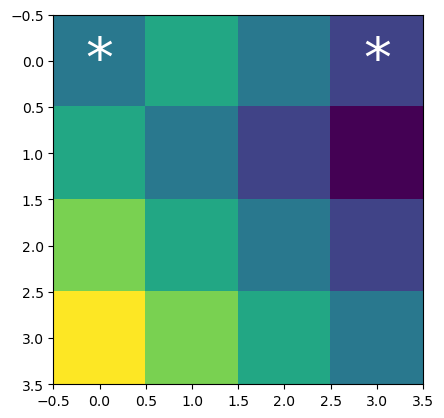

In [108]:
plt.figure()
plt.imshow(D_tele[7,:].reshape(4,4))
plt.text(*reversed(np.divmod(0,4)),'*',fontdict={'size':40,'color':'w'},va='center',ha='center')
plt.text(*reversed(np.divmod(3,4)),'*',fontdict={'size':40,'color':'w'},va='center',ha='center')